# The dataset is taken from kaggle
## Suicide Rates Overview 1985 to 2016
## Compares socio-economic info with suicide rates by year and country

### Подгружаем необходимые библиотеки

In [68]:
# Подгружаем необходимые библиотеки
import pandas as pd
import sqlite3

In [69]:
# Загружаем датасет в переменную
df = pd.read_csv('dataset_suicides.csv')

In [70]:
# Посмотрим данные первых 5-ти строк
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [72]:
# Посмотрим общую информацию о датасете
# Функция info показывает типы данных
# По количеству строк видим, что в  столбце HDI for year отсутствуют некоторые значения
dfName = [x for x in globals() if globals()[x] is df][0]

rows_num,columns_num = df.shape
print(f'Количество записей: {rows_num}')
print(f'Количество столбцов: {columns_num}\n')

print('Общая информация о датасете:\n')
print(df.info())

Количество записей: 27820
Количество столбцов: 12

Общая информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


In [73]:
# Проверим название колонок
list(df.columns)

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [74]:
# Переименуем колонки suicides_no, suicides/100k pop, gdp_for_year ($), gdp_per_capita ($)
df = df.rename(columns={'suicides_no': 'count_of_suicides', 'suicides/100k pop': 'quantity_suidides_per_100k', 
                        ' gdp_for_year ($) ': 'gdp_for_year_dollars', 'gdp_per_capita ($)': 'gdp_per_capita_dollars'})

In [75]:
# Удалим колонку country-year
df = df.drop(columns=['country-year'])

In [76]:
# Приведем название колонок к нижнему регистру и заменим пробел на '_'
df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]
df.columns

Index(['country', 'year', 'sex', 'age', 'count_of_suicides', 'population',
       'quantity_suidides_per_100k', 'hdi_for_year', 'gdp_for_year_dollars',
       'gdp_per_capita_dollars', 'generation'],
      dtype='object')

In [77]:
df['gdp_for_year_dollars'].unique()

array(['2,156,624,900', '2,126,000,000', '2,335,124,988', ...,
       '51,821,573,338', '57,690,453,461', '63,067,077,179'], dtype=object)

In [78]:
df.dtypes

country                        object
year                            int64
sex                            object
age                            object
count_of_suicides               int64
population                      int64
quantity_suidides_per_100k    float64
hdi_for_year                  float64
gdp_for_year_dollars           object
gdp_per_capita_dollars          int64
generation                     object
dtype: object

In [79]:
# Посмотрим, сколько пустых значений у нас в колонке hdi_for_year
df.isnull().sum()

country                           0
year                              0
sex                               0
age                               0
count_of_suicides                 0
population                        0
quantity_suidides_per_100k        0
hdi_for_year                  19456
gdp_for_year_dollars              0
gdp_per_capita_dollars            0
generation                        0
dtype: int64

In [80]:
# Удалим колонку hdi_for_year
df = df.drop(columns=['hdi_for_year'])

### Создаем БД SQLlite и загружаем в нее датасет

In [81]:
# Создаем базу данных
con = sqlite3.connect('D:/db_suicides', timeout=10)
cur = con.cursor()

In [82]:
# Загружаем таблицу
df.to_sql(con=con, name='db_suicides', if_exists = 'replace', index=False)

27820

In [83]:
# подключаем библиотеки seaborn и matplotlib для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ данных
Обращения производятся к БД

### 1. Посчитаем общее количество самоубийств за каждый год во всех странах:

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\2252147093.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


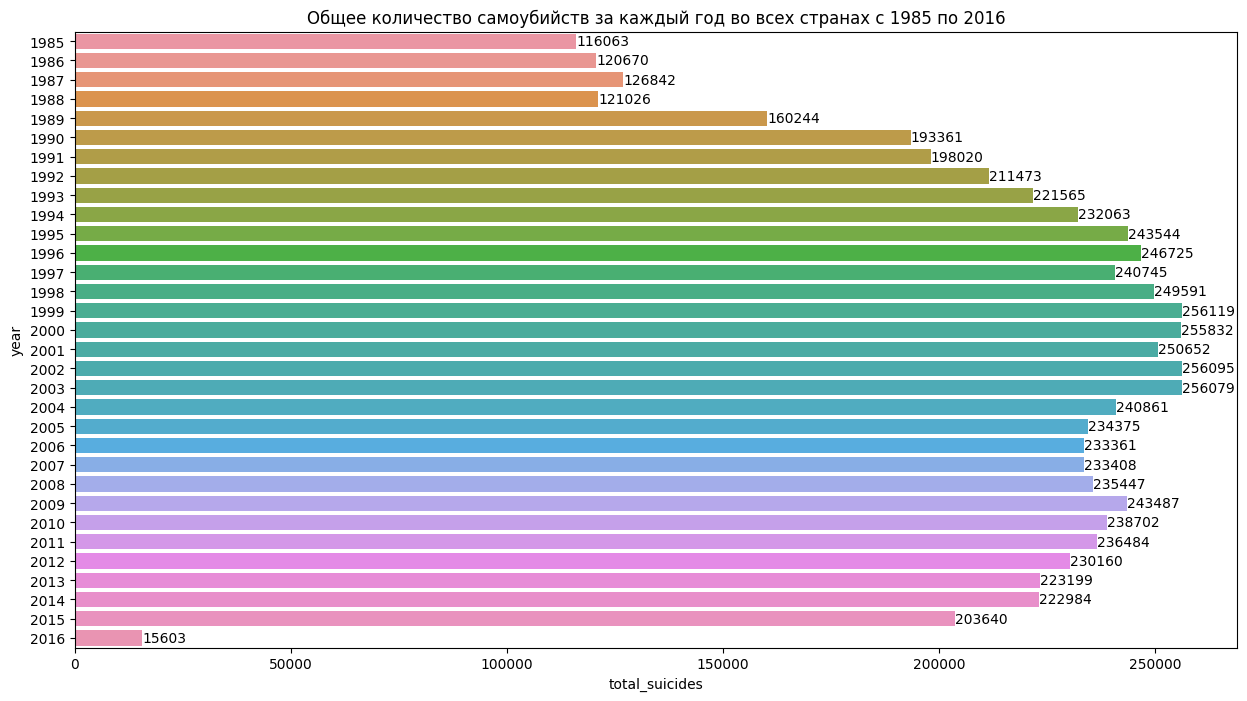

In [84]:
plt.figure(figsize=(15, 8))
plt.title('Общее количество самоубийств за каждый год во всех странах с 1985 по 2016')
sql_query = """
SELECT  
    year, 
    SUM(count_of_suicides) AS total_suicides
FROM db_suicides
GROUP BY year
ORDER BY total_suicides DESC;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="year", x="total_suicides", orient="h")  

my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i)

Как мы видим, больше всего самоубиств в мире было в:

 1999 году: 256119 человек, 

 2002 году: 256095 человек, 

 2003 году: 256079 человек, 
 
 2000 году: 255832 человек.


### 2. Посчитаем общее количество самоубийств в каждой стране и ограничим до 20, потому что в таблице 101 страна:

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\1530731460.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


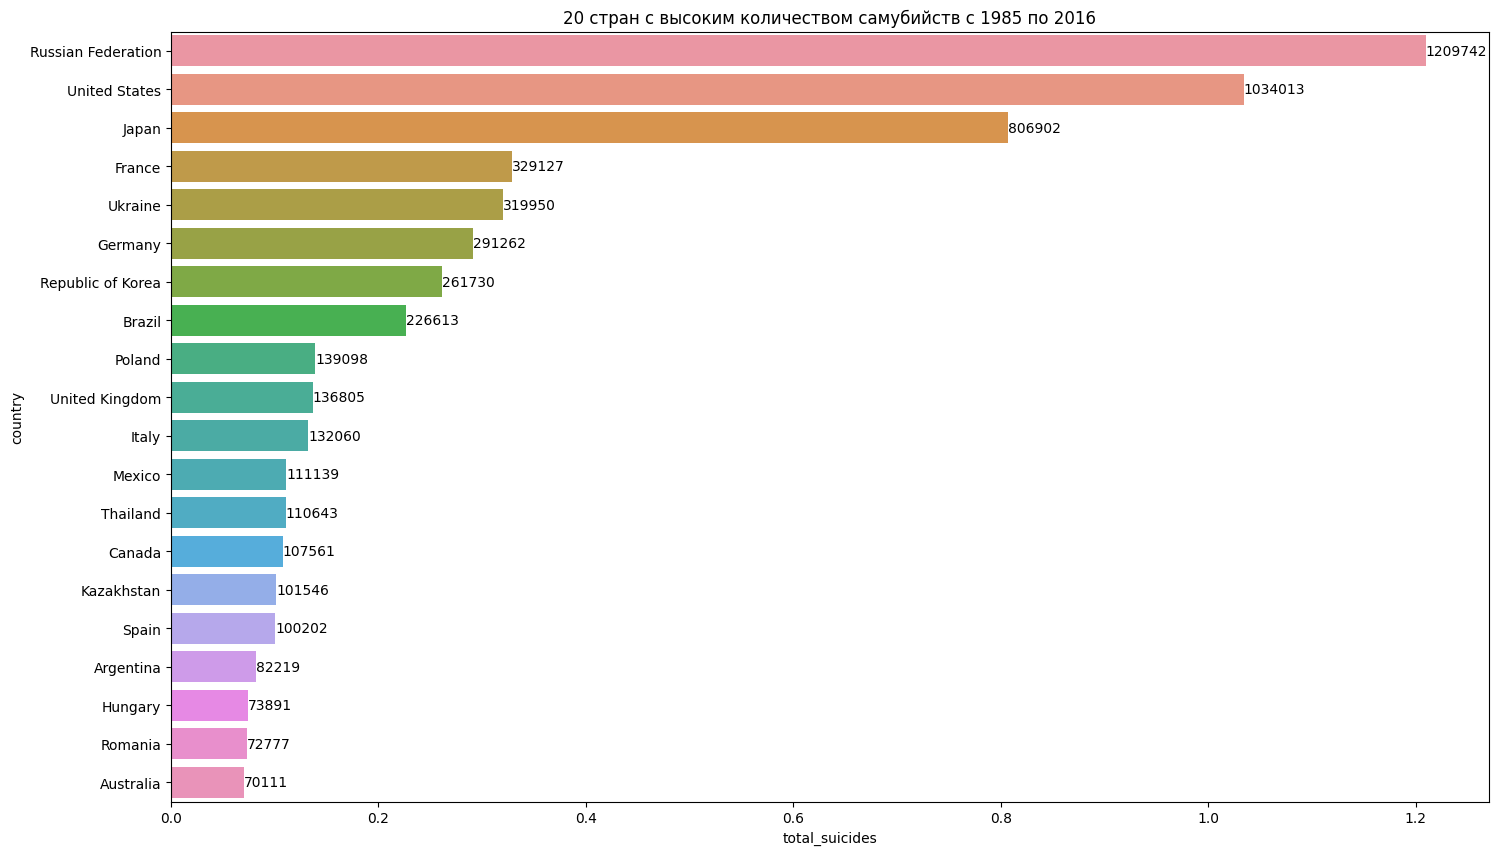

In [88]:
plt.figure(figsize=(17, 10))
plt.title('20 стран с высоким количеством самубийств с 1985 по 2016')
sql_query = """
SELECT 
    country, 
    SUM(count_of_suicides) AS total_suicides
FROM db_suicides
GROUP BY country
ORDER BY total_suicides DESC
LIMIT 20;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="country", x="total_suicides", orient="h")  

my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i, fmt="%d") 

По числу суицидов с 1985 года по 2016 год лидирует Россия: 1209742 человека

На втором месте США: 1034013 человек

Тройку замыкает Япония: 806902 человека

### 3. Посмотрим на 20 стран с минимальным количеством суицида за этот период:

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\2517442195.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


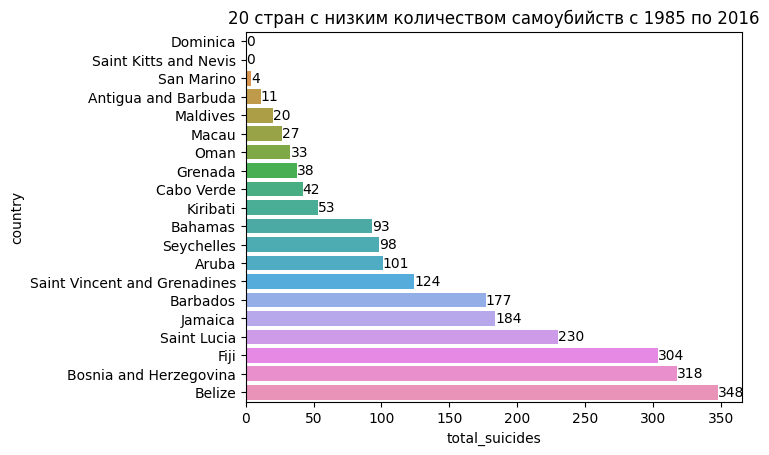

In [89]:
sql_query = """
SELECT 
    country, 
    SUM(count_of_suicides) AS total_suicides
FROM db_suicides
GROUP BY country
ORDER BY total_suicides ASC
LIMIT 20;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="country", x="total_suicides", orient="h")  

my_plot.set_xticklabels(my_plot.get_xticklabels()) 
plt.title('20 стран с низким количеством самоубийств с 1985 по 2016')

for i in my_plot.containers:
    my_plot.bar_label(i)


Как видим, с 1985 по 2016 год в таких странах как Доминика и Сент-Китс и Невис, вообще не зарегистрировано ни одного случая суицида.

### 4. Посчитаем, какие возрастные группы и пол имеют самую высокую общую смертность от самоубийств за период с 1985 по 2016 год:

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\3585456345.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


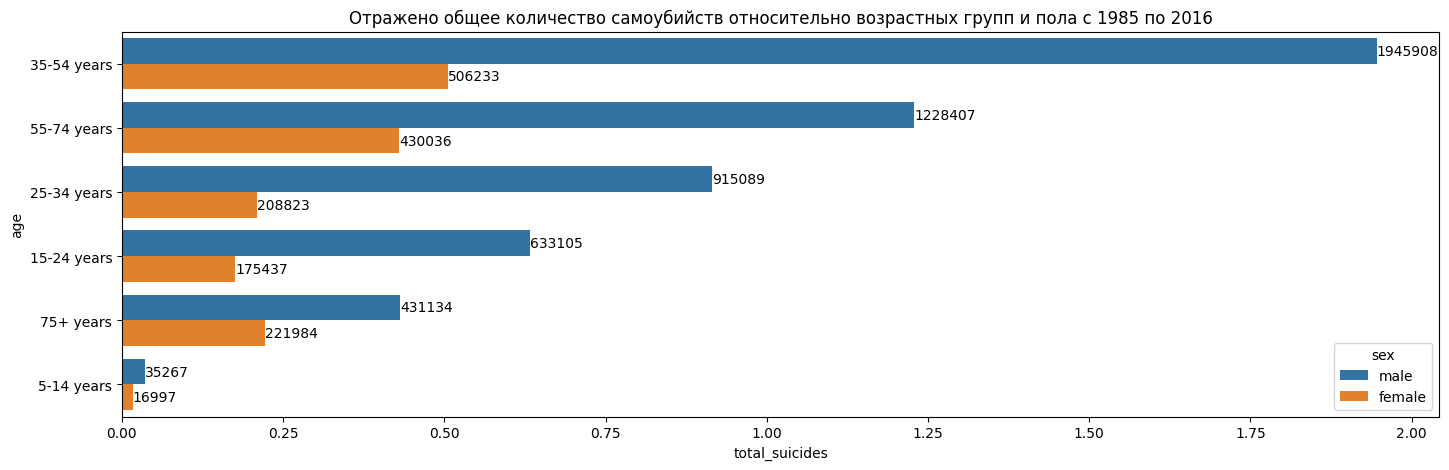

In [90]:
plt.figure(figsize=(17, 5))
plt.title('Отражено общее количество самоубийств относительно возрастных групп и пола с 1985 по 2016')
sql_query = """
SELECT 
    age, 
    sex, 
    SUM(count_of_suicides) AS total_suicides
FROM db_suicides
GROUP BY age, sex
ORDER BY total_suicides DESC;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="age", x="total_suicides", hue="sex", orient="h")  

my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i, fmt="%d")  

На графике видно, что по миру превалируют самоубийства мужского пола в возрасте от 35 до 54 лет: 1945908
Относительно женщин аналогичной возрастной группы, мужчины совершают суцид в 3,8 раза чаще.

### 6. Посмотрим количество самоубийств в России за каждый год в период с 1985 по 2016

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\3355519851.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


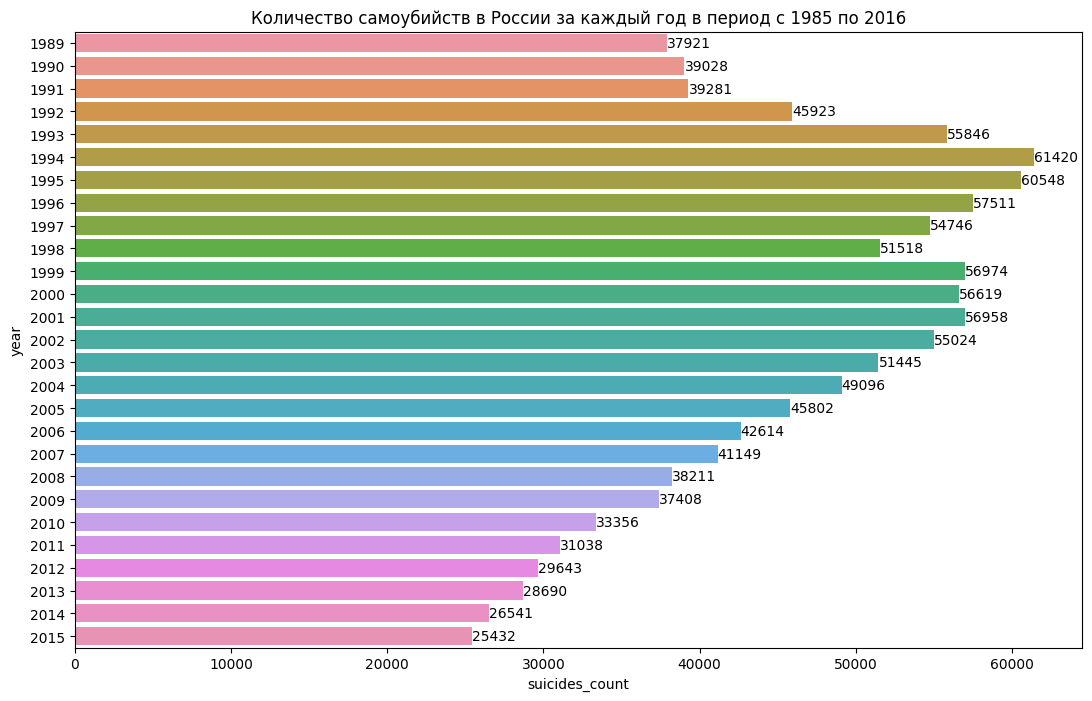

In [91]:
plt.figure(figsize=(13, 8))
plt.title('Количество самоубийств в России за каждый год в период с 1985 по 2016')
sql_query = """
SELECT 
	country,
	year,
	SUM(count_of_suicides) AS suicides_count
FROM db_suicides
WHERE country LIKE 'Russian Federation'
GROUP BY year
ORDER BY year ASC;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="year", x="suicides_count", orient="h")  

my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i, fmt="%d")

Обратим внимание, что в датасете данные о самоубийствах в России только с 1989 по 2015 год

Мы видим,  как отражается тяжелый период 90-х и начало 2000-ых

Черный вторник 1994, чеченская война, дефолт 1998. 

### 7. Посмотрим как влияет ВВП на количество самоубийств в России с 1985 по 2016 год

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\548441936.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


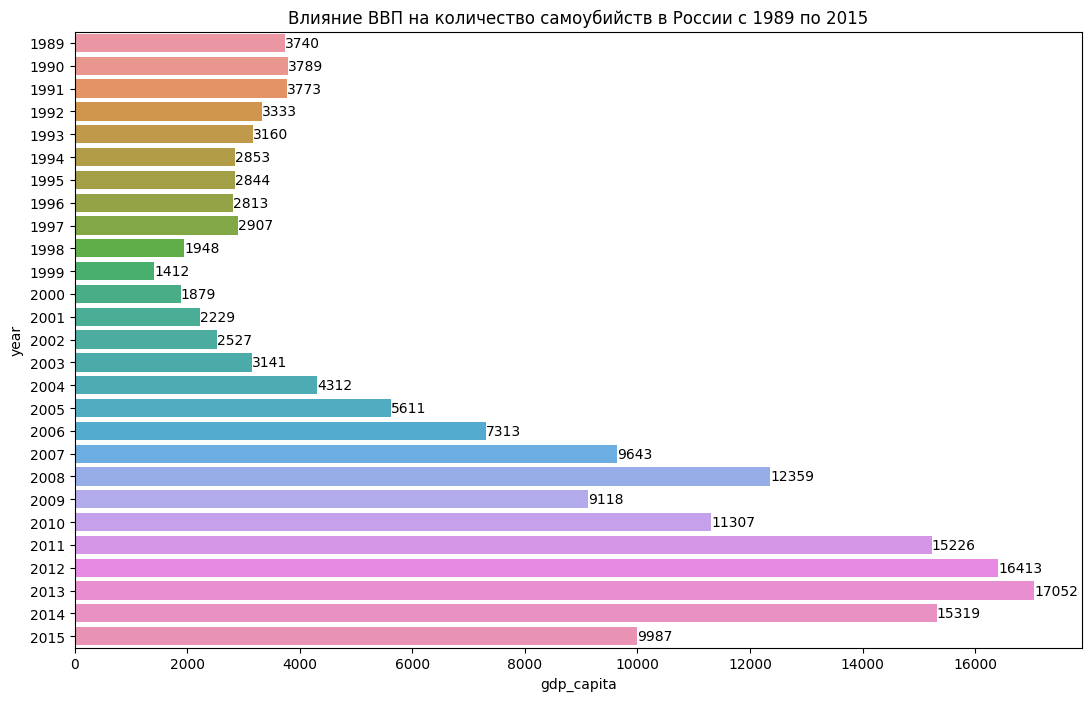

In [96]:
plt.figure(figsize=(13, 8))
plt.title('Влияние ВВП на количество самоубийств в России с 1989 по 2015')
sql_query = """
SELECT 
	country,
	year,
	SUM(count_of_suicides) AS suicides_count,
	gdp_per_capita_dollars AS gdp_capita
FROM db_suicides
WHERE country LIKE 'Russian Federation'
GROUP BY year
ORDER BY year ASC
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="year", x="gdp_capita", orient="h")
my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i)

На предыдущем графике мы видели, как после 2003 года количество самоубийств плавно идет на снижение, а на этом графике мы видим, как идет плавное увеличение ввп на душу населения. Нельзя не заметить отражение событий на графике 2008-2009 годов(кризис на финансовых рынках России) и 2014-2015 годов(валютный кризис).

## 8. Посмотрим соотношение cамоубийств по возрасту и полу в России с 1989 по 2015

C:\Users\Алексей\AppData\Local\Temp\ipykernel_9088\1623358136.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels())


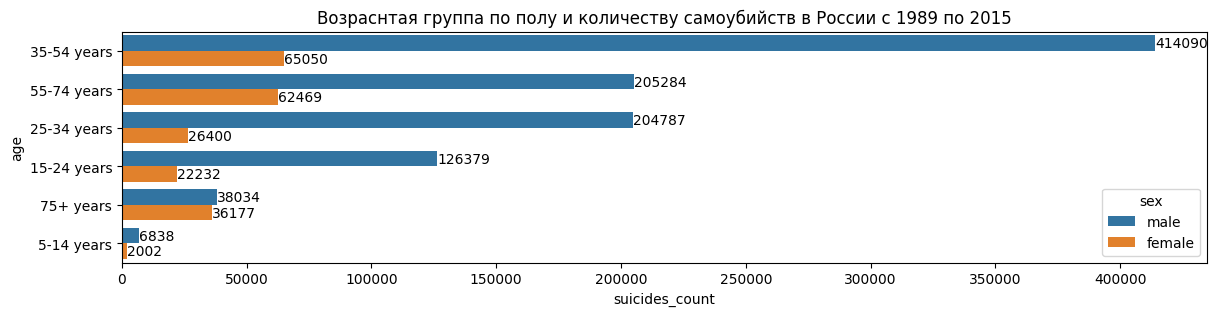

In [97]:
plt.figure(figsize=(14, 3))
plt.title('Возраснтая группа по полу и количеству самоубийств в России с 1989 по 2015')
sql_query = """
SELECT 
	country,
	sex,
	age,
	SUM(count_of_suicides) AS suicides_count
FROM db_suicides
WHERE country LIKE 'Russian Federation'
GROUP BY sex, age
ORDER BY suicides_count DESC;
"""
df_from_sql = pd.read_sql_query(sql_query, con=con)

my_plot = sns.barplot(data=df_from_sql, y="age", x="suicides_count", hue='sex', orient="h")
my_plot.set_xticklabels(my_plot.get_xticklabels()) 

for i in my_plot.containers:
    my_plot.bar_label(i, fmt="%d")

Разрыв по количеству самоубийств 75+ между полами в России сравнялись относительно мировой статистики